# ANOVA Practice with Real (Not Really) Data

### Instructions
In this lab, you’ll perform a one-way ANOVA using a real (simulated) dataset of student scores.

**Steps:**
1. Download the Excel file **`anova_student_scores.xlsx`** from Blackboard.
2. Upload it to your Colab or Jupyter environment.
3. Run each cell in order (Shift + Enter).
4. Read the explanations and answer **Question 1–8** below.
5. Submit your Blackboard quiz before **midnight tonight**.



In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

plt.rcParams['figure.figsize'] = (8,4)

## Load the Dataset

Upload the Excel file `anova_student_scores.xlsx` to your Colab/Jupyter session first.

Then run the code below to read it.


In [3]:
df = pd.read_excel('anova_student_scores.xlsx')
df.head()

,student_id,gender,group,math_score,reading_score,writing_score
0,1,Female,B,75.3,75.4,73.1
1,2,Female,C,78.1,84.3,80.4
2,3,Male,C,94.9,89.0,76.9
3,4,Male,B,78.8,77.4,64.1
4,5,Female,A,52.8,77.8,70.9


In [5]:
## Explore the Data: Let’s check the dataset shape, missing values, and group sizes.
df.info()
df.describe()

print("\nGroup counts:\n", df['group'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_id     200 non-null    int64  
 1   gender         200 non-null    object 
 2   group          200 non-null    object 
 3   math_score     200 non-null    float64
 4   reading_score  200 non-null    float64
 5   writing_score  200 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB

Group counts:
 group
A    77
C    65
B    58
Name: count, dtype: int64


**Question 1:**  
How many students are in group A?

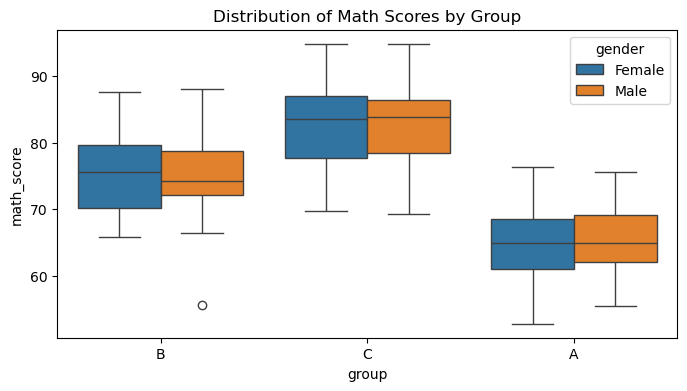

In [7]:
sns.boxplot(data=df, x='group', y='math_score', hue='gender')
plt.title("Distribution of Math Scores by Group")
plt.show()

**Question 2:**  
When you look at the box plot of math scores of groups by gender, what can you say about gender?

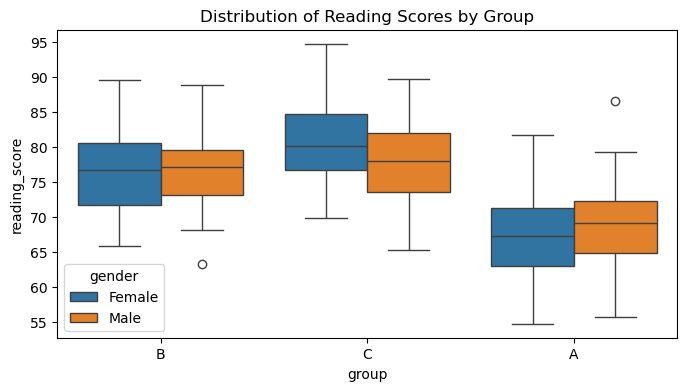

In [17]:
sns.boxplot(data=df, x='group', y='reading_score', hue='gender')
plt.title("Distribution of Reading Scores by Group")
plt.show()

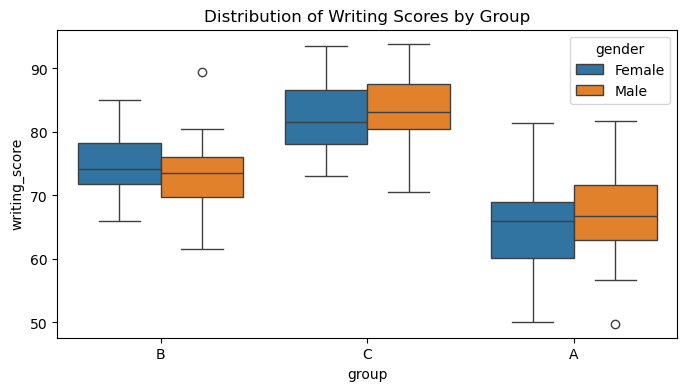

In [15]:
sns.boxplot(data=df, x='group', y='writing_score', hue='gender')
plt.title("Distribution of Writing Scores by Group")
plt.show()

**Question 3:**  
Does your answer change for either of the reading or writing scores? (write the code to visualize those scores)

In [ ]:
## Perform One-Way ANOVA on Math Scores by Group

In [9]:
model = ols('math_score ~ C(group)', data=df).fit()
anova_results = anova_lm(model)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,11065.433194,5532.716597,159.689132,5.992113e-42
Residual,197.0,6825.418606,34.646795,NaN,NaN


**Question 4:** What is the between-groups (df) shown in the ANOVA table?  
**Question 5:** What is the F-statistic (round to 3 decimals)?  
**Question 6:** What is the p-value and what does it indicate at α = 0.05?


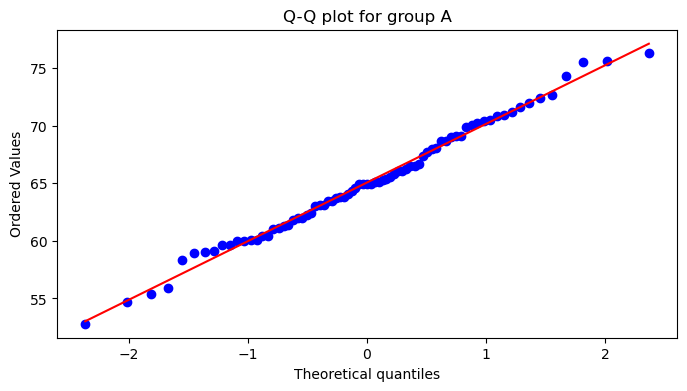

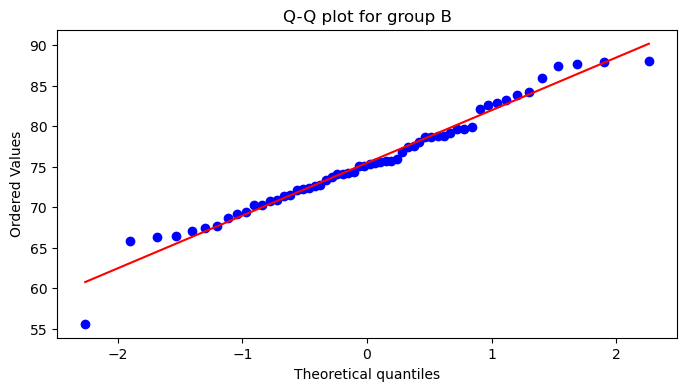

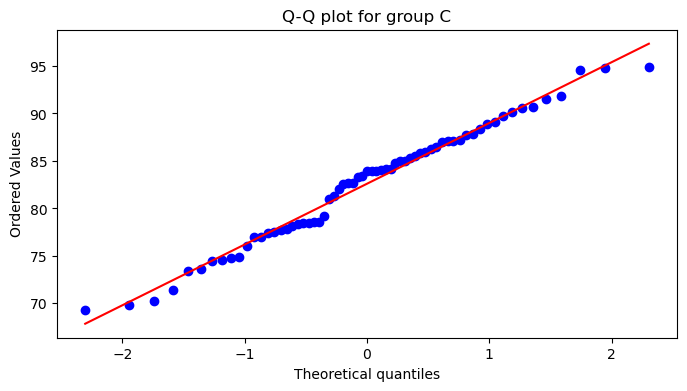

Group SDs:
group
A    5.015046
B    6.443270
C    6.309182
Name: math_score, dtype: float64

Ratio of largest to smallest SD: 1.28


In [19]:
# Normality check (Q-Q plots)
for g in sorted(df['group'].unique()):
    stats.probplot(df.loc[df['group']==g, 'math_score'], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for group {g}")
    plt.show()

# Equal variances
sds = df.groupby('group')['math_score'].std()
print("Group SDs:")
print(sds)
print("\nRatio of largest to smallest SD:", round(sds.max()/sds.min(),2))

**Question 7:**  
Is the largest standard deviation less than twice the smallest?  
Does this support the equal-variance assumption?


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B  10.3958   0.0   7.979 12.8126   True
     A      C  17.5322   0.0 15.1908 19.8736   True
     B      C   7.1364   0.0  4.6256  9.6472   True
---------------------------------------------------


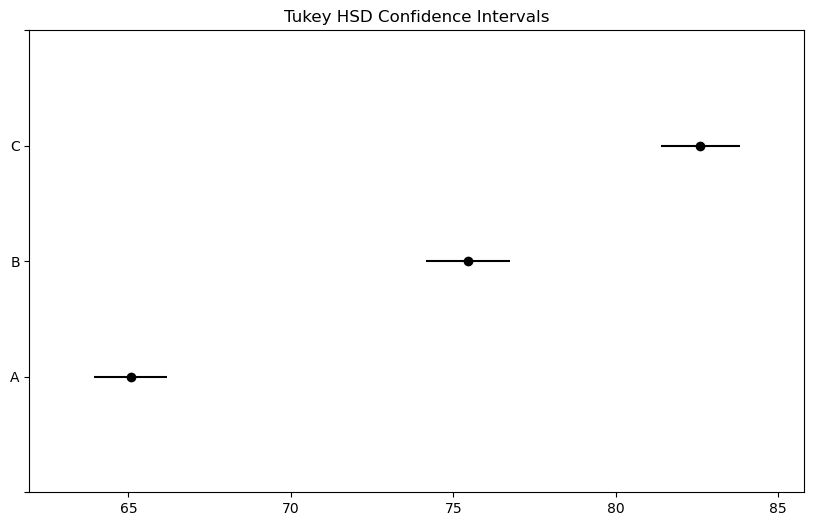

In [23]:
tukey = pairwise_tukeyhsd(endog=df['math_score'], groups=df['group'], alpha=0.05)
print(tukey)
tukey.plot_simultaneous()
plt.title("Tukey HSD Confidence Intervals")
plt.show()

**Question 8:**  
Which pairs of groups show a significant difference in math scores?


In [25]:
df.groupby('group')['math_score'].agg(['mean','std','count'])

,mean,std,count
group,,,
A,65.066234,5.015046,77
B,75.462069,6.443270,58
C,82.598462,6.309182,65


**Question 9:**  
Which group has the highest mean math score?

**Question 10:**  
Write one sentence interpreting the ANOVA results in context.


## Wrap-Up

- You completed a one-way ANOVA using real data.  
- You verified assumptions, ran post-hoc tests, and interpreted results.  

**Next:** Submit your Blackboard quiz (Extra ANOVA Exercise) before midnight.
